In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SpaceX_Falcon9.csv')
df.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      90 non-null     int64  
 1   FlightNumber    90 non-null     int64  
 2   Date            90 non-null     object 
 3   BoosterVersion  90 non-null     object 
 4   PayloadMass     85 non-null     float64
 5   Orbit           90 non-null     object 
 6   LaunchSite      90 non-null     object 
 7   Outcome         90 non-null     object 
 8   Flights         90 non-null     int64  
 9   GridFins        90 non-null     bool   
 10  Reused          90 non-null     bool   
 11  Legs            90 non-null     bool   
 12  LandingPad      64 non-null     object 
 13  Block           90 non-null     float64
 14  ReusedCount     90 non-null     int64  
 15  Serial          90 non-null     object 
 16  Longitude       90 non-null     float64
 17  Latitude        90 non-null     float

In [4]:
df.isnull().sum()/len(df)*100

Unnamed: 0         0.000000
FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        5.555556
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [5]:
# To see the unique values
for i in df.columns:
    print("****************",i,"*************")
    print()
    print(set(df[i].tolist()))
    print()

**************** Unnamed: 0 *************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}

**************** FlightNumber *************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}

**************** Date *************

{'2018-08-07', '2018-05-11', '2020-10-06', '2018-03-30', '2018-01-08', '2016-08-14', '2019-12-05', '2019-08-06', '2019-01-11', '2016-03-04', '2016-01-17', '2017-01-14', '

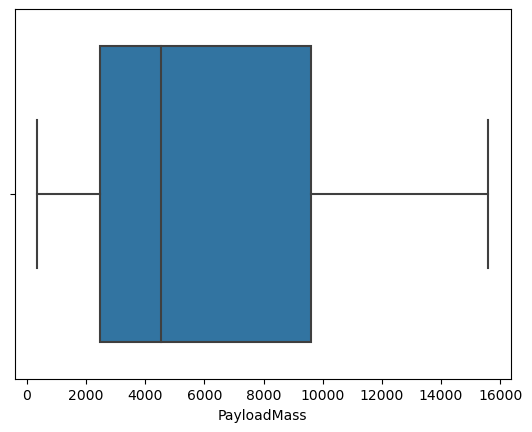

In [6]:
sns.boxplot(df['PayloadMass'])
plt.show()

In [3]:
df['PayloadMass'] = df['PayloadMass'].fillna(df['PayloadMass'].mean())

In [8]:
df.describe()

,Unnamed: 0,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,44.500000,45.500000,6123.547647,1.788889,3.500000,3.133333,-86.366477,29.449963
std,26.124701,26.124701,4732.115291,1.213172,1.595288,4.097684,14.149518,2.141306
min,0.000000,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,22.250000,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,44.500000,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,66.750000,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,89.000000,90.000000,15600.000000,6.000000,5.000000,12.000000,-80.577366,34.632093


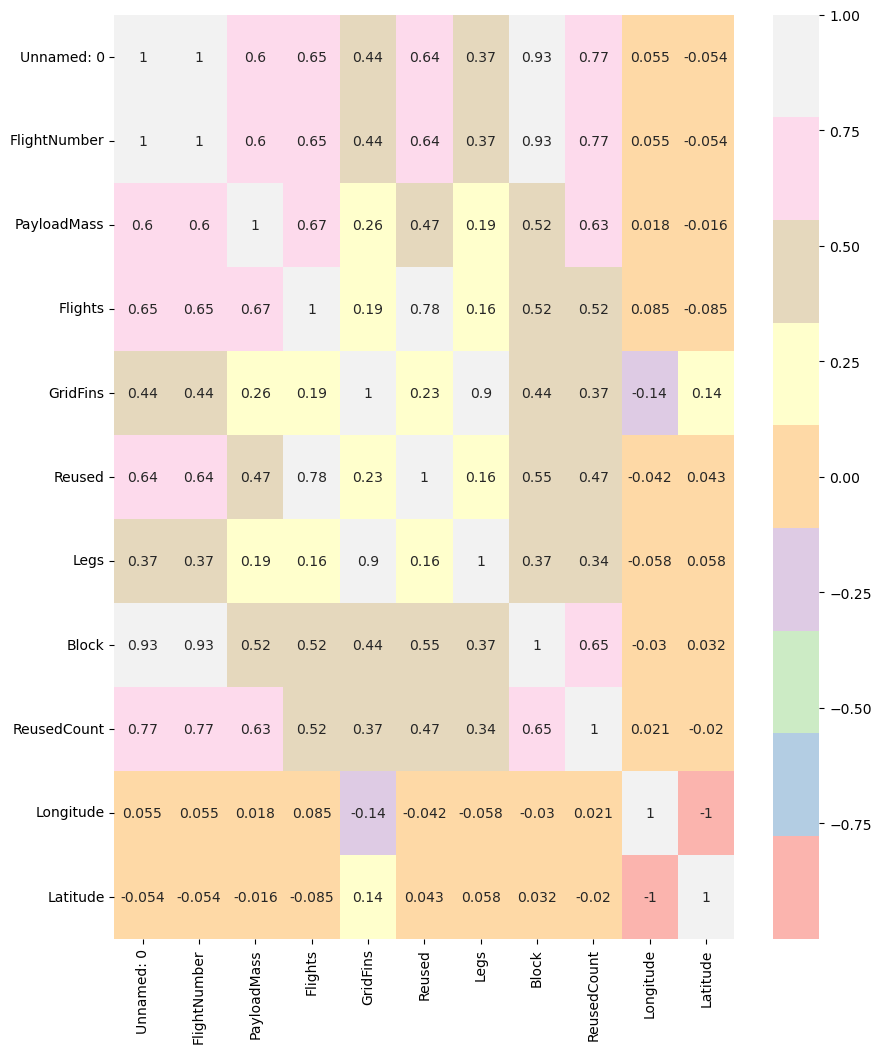

In [9]:
plt.figure(figsize = (10,12))
sns.heatmap(df.corr(), annot = True, cmap = 'Pastel1')
plt.show()

# Calculate the number of launches on each site

In [10]:
df['LaunchSite'].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [11]:
#  Calculate the number and occurrence of each orbit
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [6]:
df['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [7]:
landing_outcomes = {'True ASDS':41,'None None':19,'True RTLS':14,'False ASDS':6,'True Ocean' :5,'False Ocean':2,'None ASDS':2,'False RTLS':1}

In [8]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [9]:
bad_outcomes=set(["None None","False ASDS","False Ocean","None ASDS","False RTLS"]) 

# Create a landing outcome label from Outcome column

In [16]:
#landing_class = 0 if bad_outcome
# landing_class = 1 otherwise

In [10]:
landing_class = []
for i in df['Outcome']:
    if(i in bad_outcomes):
        landing_class.append(0)
    else:
        landing_class.append(1)

In [11]:
df['Class'] = landing_class

In [12]:
df[['Class']].head()

,Class
0,0
1,0
2,0
3,0
4,0


# Data Visualization (EDA)

<Figure size 1500x1200 with 0 Axes>

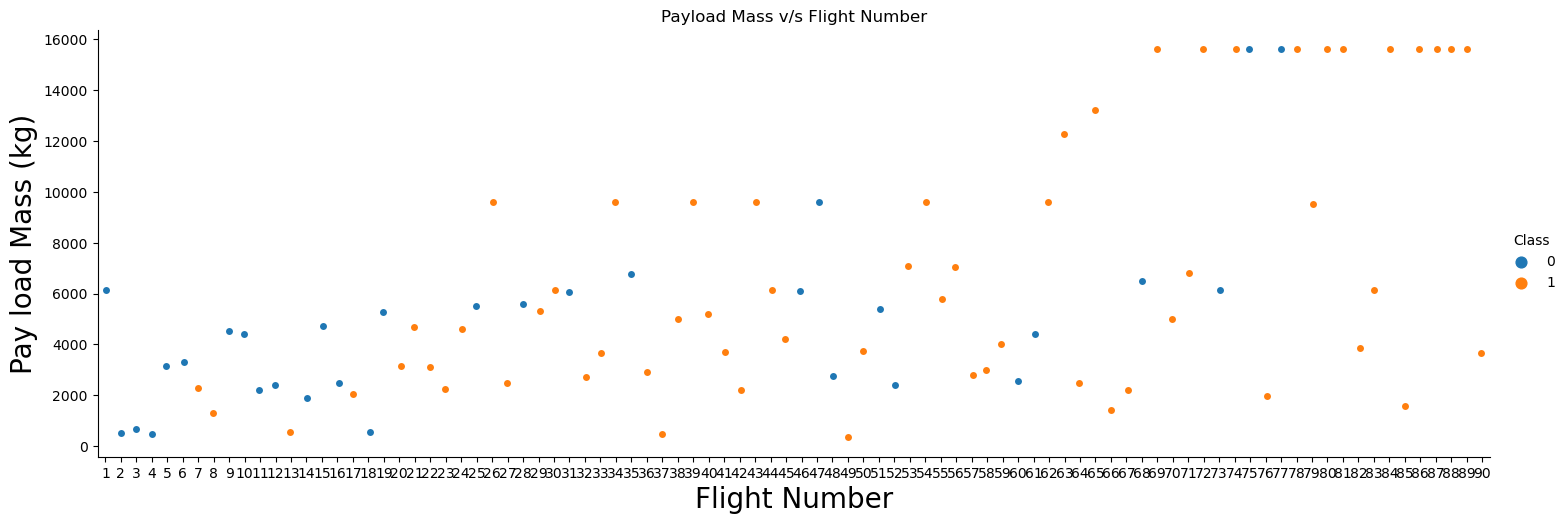

In [20]:
plt.figure(figsize = (15,12))
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.title("Payload Mass v/s Flight Number")
plt.show()

 We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

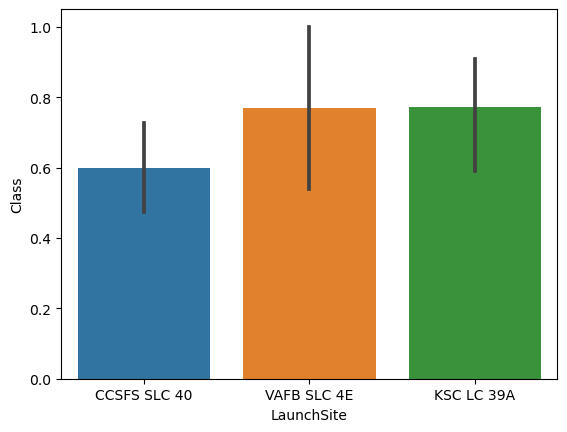

In [21]:
# Success rate of launch site
sns.barplot(y = 'Class', x = 'LaunchSite', data = df )
plt.show()

Different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

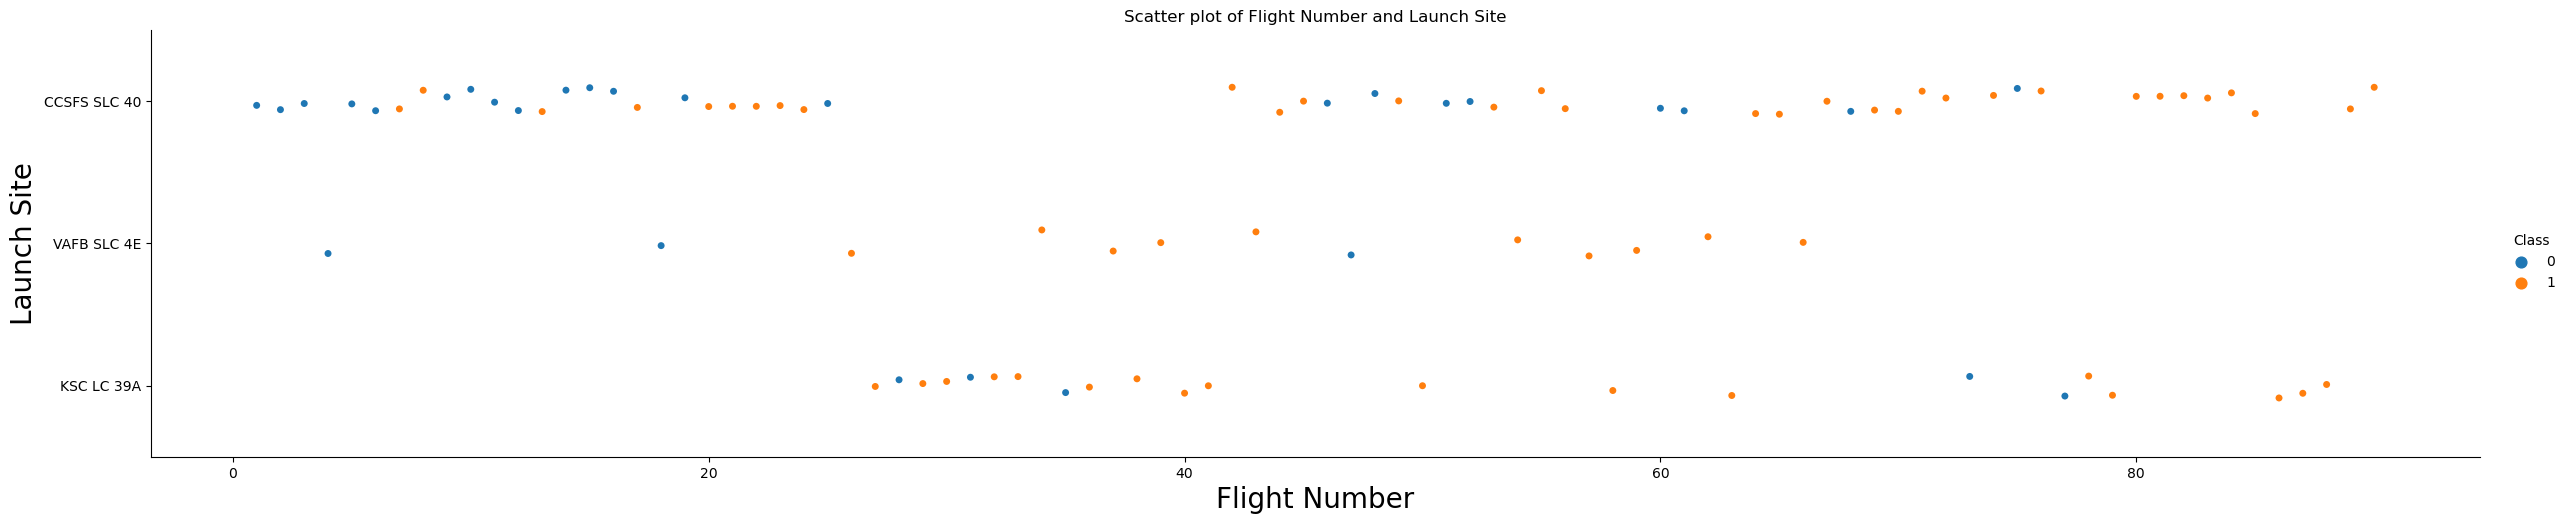

In [22]:
# Visualize the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.title("Scatter plot of Flight Number and Launch Site")
plt.show()

### Visualize the relationship between Payload and Launch Site

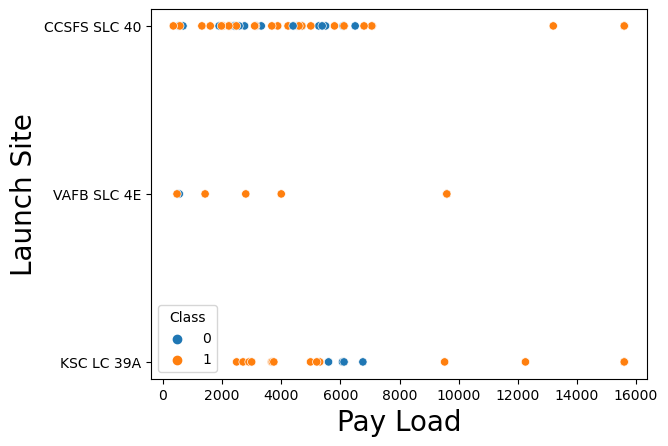

In [23]:
sns.scatterplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Pay Load",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

 For the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

###  visually check if there are any relationship between success rate and orbit type

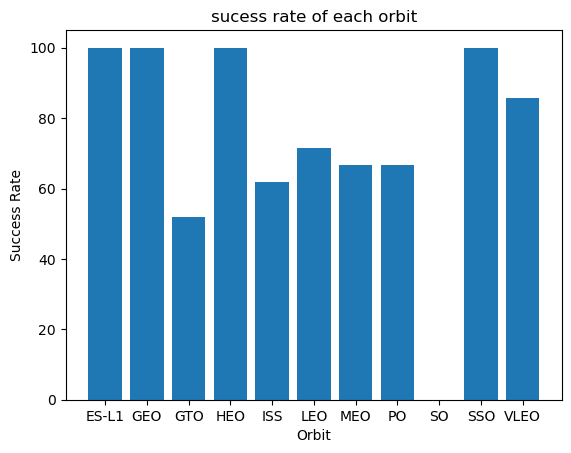

In [24]:
df_orbit = df.groupby('Orbit',axis=0).mean()
df_orbit['SR'] = df_orbit['Class']*100

plt.bar(df_orbit.index, df_orbit['SR'])
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.title('sucess rate of each orbit')
plt.show()

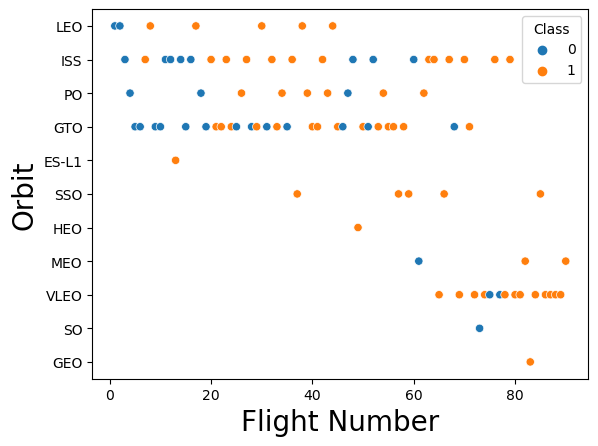

In [25]:
#if there is any relationship between FlightNumber and Orbit type
sns.scatterplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

 You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### Check the relation between Orbit and Payload Mass

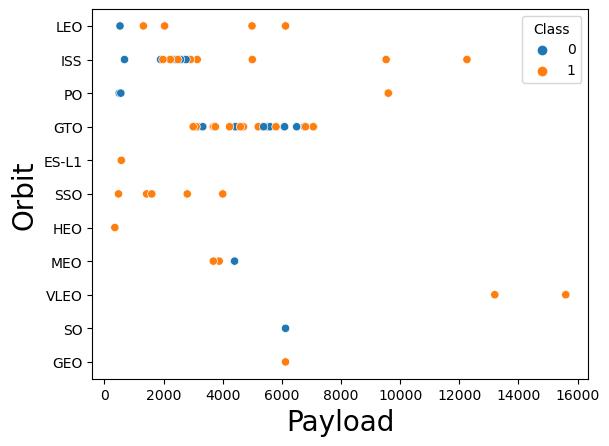

In [26]:
sns.scatterplot(y="Orbit", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Payload",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

 With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.



In [27]:
# Plotting the success rate with the year
df['Year'] = df['Date'].apply(lambda x : str(x).split('-')[0])

In [28]:
date = df.groupby('Year').mean()
date['SR'] = date['Class']*100
date


,Unnamed: 0,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class,SR
Year,,,,,,,,,,,,,
2010,0.0,1.0,6123.547647,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-80.577366,28.561857,0.000000,0.000000
2012,1.0,2.0,525.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-80.577366,28.561857,0.000000,0.000000
2013,3.0,4.0,1449.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-93.921854,30.585269,0.000000,0.000000
2014,7.5,8.5,3019.333333,1.000000,0.000000,0.000000,0.333333,1.000000,0.000000,-80.577366,28.561857,0.333333,33.333333
2015,13.5,14.5,2346.833333,1.000000,0.833333,0.000000,0.833333,1.000000,0.000000,-80.577366,28.561857,0.333333,33.333333
2016,20.5,21.5,3639.125000,1.000000,1.000000,0.000000,1.000000,1.875000,0.375000,-85.581549,29.320637,0.625000,62.500000
2017,33.5,34.5,5366.752647,1.277778,0.833333,0.277778,0.777778,3.166667,0.777778,-91.715499,30.278835,0.833333,83.333333
2018,51.5,52.5,4833.799869,1.555556,0.833333,0.500000,0.833333,4.500000,2.055556,-89.476646,29.915932,0.611111,61.111111
2019,65.5,66.5,7509.370000,2.200000,0.900000,0.700000,0.900000,5.000000,6.200000,-88.586718,29.780524,0.900000,90.000000


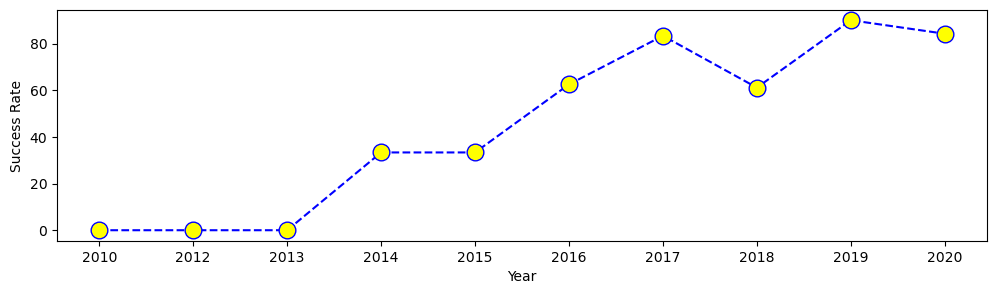

In [29]:
plt.figure(figsize = (12,3))
plt.plot(date.index, date['SR'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

 you can observe that the sucess rate since 2013 kept increasing till 2020

# MODELLING

In [4]:
df.columns

Index(['Unnamed: 0', 'FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass',
       'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused',
       'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

In [13]:
# Columns required for the final predictions
data = df[['FlightNumber','PayloadMass','Orbit', 'LaunchSite','Flights', 'GridFins', 'Reused',
       'Legs', 'Block', 'ReusedCount','Class']]

In [14]:
data.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,1.0,0,0
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,1.0,0,0
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,1.0,0,0
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,1.0,0,0
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,1.0,0,0


## Encoding

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Flights       90 non-null     int64  
 5   GridFins      90 non-null     bool   
 6   Reused        90 non-null     bool   
 7   Legs          90 non-null     bool   
 8   Block         90 non-null     float64
 9   ReusedCount   90 non-null     int64  
 10  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(2)
memory usage: 6.0+ KB


In [15]:
data = pd.get_dummies(data, columns = ['Orbit','LaunchSite'], drop_first = True)

In [16]:
data.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_GEO,...,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data['GridFins'] = np.where(data['GridFins'] == False,0,1)
data['Reused'] = np.where(data['Reused'] == False,0,1)
data['Legs'] = np.where(data['Legs'] == False,0,1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FlightNumber            90 non-null     int64  
 1   PayloadMass             90 non-null     float64
 2   Flights                 90 non-null     int64  
 3   GridFins                90 non-null     int32  
 4   Reused                  90 non-null     int32  
 5   Legs                    90 non-null     int32  
 6   Block                   90 non-null     float64
 7   ReusedCount             90 non-null     int64  
 8   Class                   90 non-null     int64  
 9   Orbit_GEO               90 non-null     uint8  
 10  Orbit_GTO               90 non-null     uint8  
 11  Orbit_HEO               90 non-null     uint8  
 12  Orbit_ISS               90 non-null     uint8  
 13  Orbit_LEO               90 non-null     uint8  
 14  Orbit_MEO               90 non-null     uint

In [19]:
# split the data into dependent and independent variable
x = data.drop('Class', axis = 1)
y = data['Class']

In [20]:
x.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,1,6123.547647,1,0,0,0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,525.000000,1,0,0,0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,677.000000,1,0,0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,500.000000,1,0,0,0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,3170.000000,1,0,0,0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [22]:
y.value_counts() # to check imbalance of dataset

1    60
0    30
Name: Class, dtype: int64

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [24]:
pd.DataFrame(x_scaler, columns = x.columns).head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,-1.712912,0.000000,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.768943,-0.106,-0.654654,-0.106,-0.551677,3.443420,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-0.568796,-0.410891
1,-1.674419,-1.189724,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.768943,-0.106,-0.654654,-0.106,-0.551677,3.443420,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-0.568796,-0.410891
2,-1.635927,-1.157423,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.768943,-0.106,-0.654654,-0.106,1.812654,-0.290409,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-0.568796,-0.410891
3,-1.597434,-1.195037,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.768943,-0.106,-0.654654,-0.106,-0.551677,-0.290409,-0.185695,3.000000,-0.106,-0.242536,-0.429198,-0.568796,2.433737
4,-1.558942,-0.627646,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.768943,-0.106,1.527525,-0.106,-0.551677,-0.290409,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-0.568796,-0.410891


In [25]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

In [26]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(72, 20) (18, 20) (72,) (18,)


## Logistic Regression

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameters ={"C":[0.01,0.1,1],'penalty':['l2','l1'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters,cv=10)
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs']})

In [28]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [29]:
#predictions
train_pred_lr = logreg_cv.predict(x_train)
test_pred_lr = logreg_cv.predict(x_test)

In [30]:
# Evaluate the metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
print(confusion_matrix(y_train,train_pred_lr))
print()
print(confusion_matrix(y_test,test_pred_lr))

[[19  5]
 [ 2 46]]

[[ 2  4]
 [ 0 12]]


In [32]:
print(classification_report(y_train,train_pred_lr))
print()
print(classification_report(y_test,test_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.90      0.96      0.93        48

    accuracy                           0.90        72
   macro avg       0.90      0.88      0.89        72
weighted avg       0.90      0.90      0.90        72


              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86        12

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78      0.74        18



In [36]:
#list to store the accuracy value
train_accu = []
test_accu = []
train_mean = []
test_mean = []

In [35]:
print(accuracy_score(y_train,train_pred_lr))
train_accu.append(accuracy_score(y_train,train_pred_lr))
print()
print(accuracy_score(y_test,test_pred_lr))
test_accu.append(accuracy_score(y_test,test_pred_lr))

0.9027777777777778

0.7777777777777778


In [37]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logreg_cv, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logreg_cv, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [0.625      0.875      1.         0.85714286 0.85714286 1.
 0.85714286 0.85714286 0.71428571 0.85714286]

Train Mean Accuracy 0.85

Train Max Accuracy 1.0

Test Accuracy [0.5 0.  0.5 1.  0.5 0.  1.  1.  1.  1. ]

Test Mean Accuracy 0.65

Test Max Accuracy 1.0


## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [39]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [40]:
tree_cv = GridSearchCV(dtree, parameters,cv=10)
tree_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [41]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


In [42]:
#predictions
train_pred_dtree = tree_cv.predict(x_train)
test_pred_dtree = tree_cv.predict(x_test)

In [43]:
print(confusion_matrix(y_train,train_pred_dtree))
print()
print(confusion_matrix(y_test,test_pred_dtree))

[[23  1]
 [ 3 45]]

[[4 2]
 [3 9]]


In [44]:
print(classification_report(y_train,train_pred_dtree))
print()
print(classification_report(y_test,test_pred_dtree))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.98      0.94      0.96        48

    accuracy                           0.94        72
   macro avg       0.93      0.95      0.94        72
weighted avg       0.95      0.94      0.94        72


              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.82      0.75      0.78        12

    accuracy                           0.72        18
   macro avg       0.69      0.71      0.70        18
weighted avg       0.74      0.72      0.73        18



In [45]:
print(accuracy_score(y_train,train_pred_dtree))
train_accu.append(accuracy_score(y_train,train_pred_dtree))
print()
print(accuracy_score(y_test,test_pred_dtree))
test_accu.append(accuracy_score(y_test,test_pred_dtree))

0.9444444444444444

0.7222222222222222


In [46]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(tree_cv, x_train, y_train, cv=10)
test_accuracy = cross_val_score(tree_cv, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [0.5        0.875      1.         0.71428571 0.85714286 0.85714286
 0.71428571 1.         0.71428571 0.85714286]

Train Mean Accuracy 0.8089285714285716

Train Max Accuracy 1.0

Test Accuracy [1.  0.5 0.5 1.  0.  0.  0.5 1.  1.  1. ]

Test Mean Accuracy 0.65

Test Max Accuracy 1.0


## Random Forest 

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()

In [48]:
parameters = {'oob_score':[False,True], 'random_state':[100,150,200,250],
                            'n_estimators':[100,150,200,250],'max_depth':[2*n for n in range(1,10)],
                            'min_samples_leaf':[1,2,3,5],'min_samples_split':[1,2,3,5],
                            'max_features':["auto", "sqrt", "log2"]}

In [ ]:
rfr_cv = GridSearchCV(rfr, parameters,cv=10)
rfr_cv.fit(x_train,y_train)

In [ ]:
#predictions
train_pred_rfr = rfr_cv.predict(x_train)
test_pred_rfr = rfr_cv.predict(x_test)

In [ ]:
print(confusion_matrix(y_train,train_pred_rfr))
print()
print(confusion_matrix(y_test,test_pred_rfr))

In [ ]:
print(classification_report(y_train,train_pred_rfr))
print()
print(classification_report(y_test,test_pred_rfr))

In [ ]:
print(accuracy_score(y_train,train_pred_rfr))
train_accu.append(accuracy_score(y_train,train_pred_rfr))
print()
print(accuracy_score(y_test,test_pred_rfr))
test_accu.append(accuracy_score(y_test,test_pred_rfr))

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rfr_cv, x_train, y_train, cv=10)
test_accuracy = cross_val_score(rfr_cv, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

## XGBOOST

In [1]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
parameters = {'n_eatimators':[100,150,200],'min_child_weight':[2,3,5],
             'eval_metric':['auc'],'colsample_bytree' : 0.75, 'subsample': 0.9}

xgb_cv = GridSearch(xgb,parameters,cv=10)
xgb_cv.fit(x_train,y_train)

In [ ]:
#predictions
train_pred_xgb = xgb_cv.predict(x_train)
test_pred_xgb = xgb_cv.predict(x_test)

In [ ]:
print(confusion_matrix(y_train,train_pred_xgb))
print()
print(confusion_matrix(y_test,test_pred_xgb))

In [ ]:
print(classification_report(y_train,train_pred_xgb))
print()
print(classification_report(y_test,test_pred_xgb))

In [ ]:
print(accuracy_score(y_train,train_pred_xgb))
train_accu.append(accuracy_score(y_train,train_pred_xgb))
print()
print(accuracy_score(y_test,test_pred_xgb))
test_accu.append(accuracy_score(y_test,test_pred_xgb))

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb_cv, x_train, y_train, cv=10)
test_accuracy = cross_val_score(xgb_cv, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}


knn_cv = GridSearchCV(knn, parameters, cv = 10)
knn_cv.fit(x_train, y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)

In [ ]:
#predictions
train_pred_knn = knn_cv.predict(x_train)
test_pred_knn = knn_cv.predict(x_test)

In [ ]:
print(confusion_matrix(y_train,train_pred_knn))
print()
print(confusion_matrix(y_test,test_pred_knn))

In [ ]:
print(classification_report(y_train,train_pred_knn))
print()
print(classification_report(y_test,test_pred_knn))

In [ ]:
print(accuracy_score(y_train,train_pred_knn))
train_accu.append(accuracy_score(y_train,train_pred_knn))
print()
print(accuracy_score(y_test,test_pred_knn))
test_accu.append(accuracy_score(y_test,test_pred_knn))

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(knn_cv, x_train, y_train, cv=10)
test_accuracy = cross_val_score(knn_cv, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

## SVM

In [ ]:
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
svm = SVC()

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [ ]:
svm_cv = GridSearchCV(svm, parameters,cv=10)
svm_cv.fit(x_train,y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)

In [ ]:
#predictions
train_pred_svm = svm_cv.predict(x_train)
test_pred_svm = svm_cv.predict(x_test)

In [ ]:
print(confusion_matrix(y_train,train_pred_svm))
print()
print(confusion_matrix(y_test,test_pred_svm))

In [ ]:
print(classification_report(y_train,train_pred_svm))
print()
print(classification_report(y_test,test_pred_svm))

In [ ]:
print(accuracy_score(y_train,train_pred_svm))
train_accu.append(accuracy_score(y_train,train_pred_svm))
print()
print(accuracy_score(y_test,test_pred_svm))
test_accu.append(accuracy_score(y_test,test_pred_svm))

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(svm_cv, x_train, y_train, cv=10)
test_accuracy = cross_val_score(svm_cv, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

# Finding the best model
 Accuracy Comparison of different algorithms on training data and testing data

In [ ]:
algorithm = ['LogisticRegression','DecisionTree','RandomForest', 'XGBOOST','KNN','SVM']
accu_data = {'Training Accuracy':train_accu,'Test Accuracy':test_accu,'Train Mean':train_mean,'Test Mean':test_mean}
model = pd.DataFrame(accu_data, index = algorithm)
model

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(model.index, model['Training Accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(model.index, model['Test Accuracy'])
plt.show()